In [1]:
# ! pip install pandas seaborn matplotlib scikit-learn numpy pyod

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from scipy.stats import boxcox


## Load churn data

In [3]:
df = pd.read_csv('churn_data.csv', 
index_col = 'customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


In [4]:
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


# Filtering data

## Filtering data based on Churn values

In [5]:
churn_counts = df['Churn'].value_counts()
churn_counts

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Filter churn data for customers with churn equal to Yes

In [6]:
churn_df = df[df['Churn'] == 'Yes']
unique_churn_values = churn_df['Churn'].unique()
unique_churn_values

array(['Yes'], dtype=object)

## Filter dataset for customers with tenure less than 10

In [7]:
least_tenure_df = df[df['tenure'] < 20]
least_tenure_df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
9305-CDSKC,8,Yes,Month-to-month,Electronic check,99.65,820.50,Yes
6713-OKOMC,10,No,Month-to-month,Mailed check,29.75,301.90,No


In [8]:
False == 0

True

## Check for outliers

In [9]:


numeric_columns = df.select_dtypes(include=np.number).columns

z_scores = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()

print(z_scores)



              tenure  MonthlyCharges  TotalCharges
customerID                                        
7590-VHVEG -1.277354       -1.160241     -0.994123
5575-GNVDE  0.066323       -0.259611     -0.173727
3668-QPYBK -1.236636       -0.362635     -0.959581
7795-CFOCW  0.514215       -0.746482     -0.195234
9237-HQITU -1.236636        0.197351     -0.940391
...              ...             ...           ...
6840-RESVB -0.340852        0.665945     -0.129171
2234-XADUH  1.613587        1.277443      2.240896
4801-JZAZL -0.870179       -1.168549     -0.854453
8361-LTMKD -1.155201        0.320315     -0.872033
3186-AJIEK  1.369282        1.358865      2.012201

[7043 rows x 3 columns]


## Set a z-score threshold for identifying outliers

In [10]:
z_score_threshold = 3

## Identify outliers using z-scores

In [11]:
outliers = (np.abs(z_scores) > z_score_threshold).any(axis=1)
outliers

customerID
7590-VHVEG    False
5575-GNVDE    False
3668-QPYBK    False
7795-CFOCW    False
9237-HQITU    False
              ...  
6840-RESVB    False
2234-XADUH    False
4801-JZAZL    False
8361-LTMKD    False
3186-AJIEK    False
Length: 7043, dtype: bool

## Visualize outliers using a boxplot

Text(0.5, 1.0, 'Boxplot of Numeric Columns')

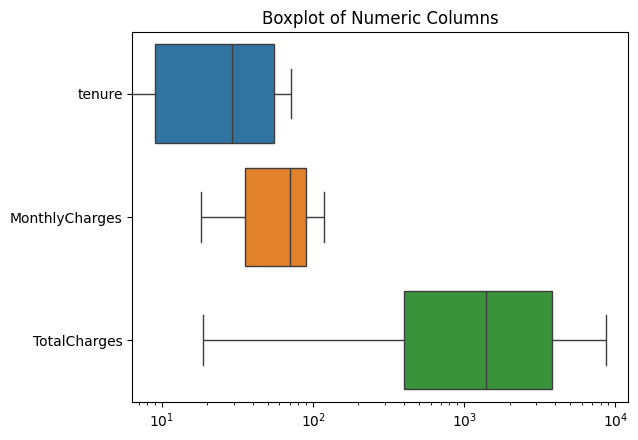

In [12]:
ax = sns.boxplot(data=df, orient='h')
ax.set_xscale("log")
plt.title("Boxplot of Numeric Columns")


## Highlight outliers with red colour

In [13]:

outlier_indices = np.where(np.abs(z_scores) > z_score_threshold)

# Check if there are outliers
if len(outlier_indices[0]) > 0:
    print("Outlier Indices:", outlier_indices)
    print("Outlier Values:", df.iloc[outlier_indices])

    # Plot the outliers
    plt.scatter(outlier_indices, np.zeros_like(outlier_indices), color='red', label='Outliers')
    plt.xlabel("Index")
    plt.title("Identification of Outliers")
    plt.legend()
    plt.show()
else:
    print("No outliers found.")

No outliers found.


## Clipping outliers to upper and lower bounds

In [14]:
# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Calculate quantiles for numeric columns
for column in numeric_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    df[column] = df[column].clip(lower=lower_boundary, upper=upper_boundary)


## Visualize the data after handling outliers

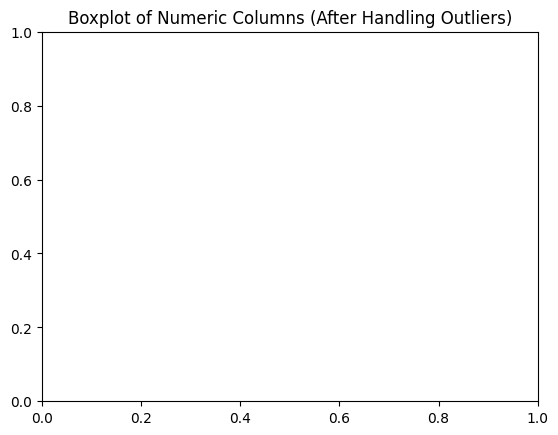

In [15]:
ax.set_xscale("log")
plt.title("Boxplot of Numeric Columns (After Handling Outliers)")

plt.show()

## Check for missing values

In [16]:
print("Missing Values Before Handling:")
print(df.isna().sum())

Missing Values Before Handling:
tenure             0
PhoneService       0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64


## Drop rows with missing values

In [17]:
df.dropna(inplace=True)

## Convert categorical columns to numeric 

In [18]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df['Churn'].value_counts()


Churn
0    5163
1    1869
Name: count, dtype: int64

In [19]:
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['PhoneService'].value_counts()

PhoneService
1    6352
0     680
Name: count, dtype: int64

## Using pandas to get dummies

In [20]:
df_dummies = pd.get_dummies(df, columns=['Contract', 'PaymentMethod'], drop_first=True)

In [21]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   PhoneService                           7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   Contract_One year                      7032 non-null   bool   
 6   Contract_Two year                      7032 non-null   bool   
 7   PaymentMethod_Credit card (automatic)  7032 non-null   bool   
 8   PaymentMethod_Electronic check         7032 non-null   bool   
 9   PaymentMethod_Mailed check             7032 non-null   bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 364.0+ KB


## Feature Engineering

In [22]:
df_copy = df.copy()

## Transform MonthlyCharges using logarithm

In [23]:
df_copy['MonthlyCharges_log'] = np.log(df_copy['MonthlyCharges'])

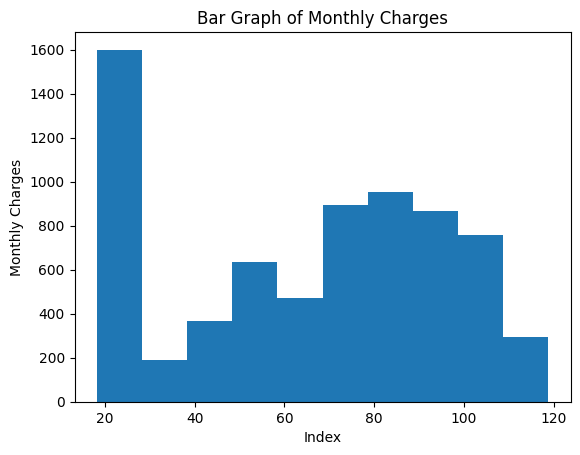

In [24]:
df_copy['MonthlyCharges'].plot.hist()
plt.xlabel('Index')
plt.ylabel('Monthly Charges')
plt.title('Bar Graph of Monthly Charges')
plt.show()


## Ratio of TotalCharges to Tenure

In [25]:
df_copy['TotalCharges_Tenure_Ratio'] = df_copy['TotalCharges'] / df_copy['tenure']

## Ratio of MonthlyCharges to TotalCharges

In [26]:
df_copy['MonthlyCharges_to_TotalCharges_Ratio'] = df_copy['MonthlyCharges'] / df_copy['TotalCharges']

## Visualization for the new features

In [27]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

## Histogram for MonthlyCharges_log

Text(0.5, 1.0, 'Histogram: MonthlyCharges_log')

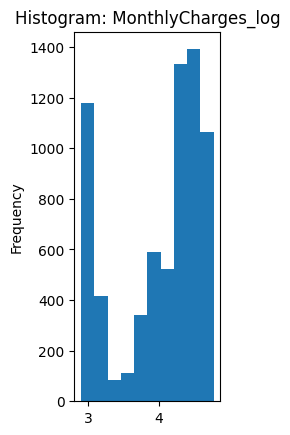

In [28]:
plt.subplot(1, 3, 1)
df_copy['MonthlyCharges_log'].plot.hist()
plt.title("Histogram: MonthlyCharges_log")

## Scatter plot for TotalCharges_Tenure_Ratio

Text(0.5, 1.0, 'Scatter Plot: TotalCharges vs. Tenure')

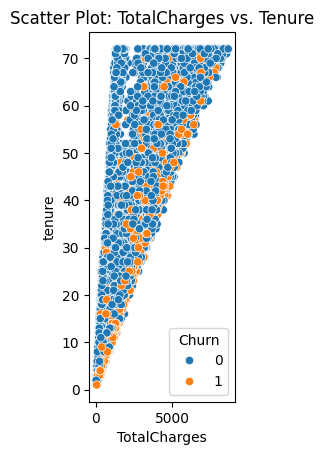

In [29]:
plt.subplot(1, 3, 2)
sns.scatterplot(x='TotalCharges', y='tenure', hue='Churn', data=df_copy)
plt.title("Scatter Plot: TotalCharges vs. Tenure")

## Scatter plot for MonthlyCharges_to_TotalCharges_Ratio

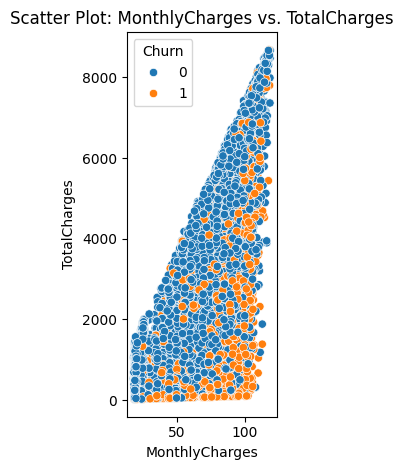

In [30]:
plt.subplot(1, 3, 3)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df_copy)
plt.title("Scatter Plot: MonthlyCharges vs. TotalCharges")
plt.tight_layout()
plt.show()

## Transform customerID column

In [31]:
df_copy['customerID'] = range(1, len(df_copy) + 1)

## Save to csv file

In [32]:
df_copy.to_csv('new_churn_data.csv', index=False)

## Advanced outlier detection

In [33]:
numeric_columns = df.select_dtypes(exclude=['object']).columns

## Robust scaling of numeric columns

In [34]:
scaler = RobustScaler()
scaled_numeric = scaler.fit_transform(df[numeric_columns])

## Boxplot for scaled numeric data

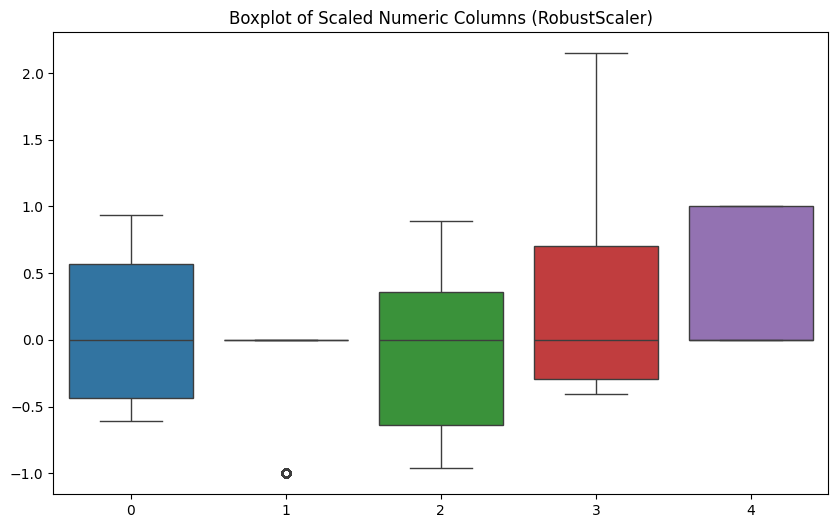

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_numeric)
plt.title("Boxplot of Scaled Numeric Columns (RobustScaler)")
plt.show()

## Box-Cox transform

In [36]:

df['boxcox_tenure'], lambda_value = boxcox(df['tenure'] + 1)  # Adding 1 to handle non-positive values

## Plot the density of the original and transformed data

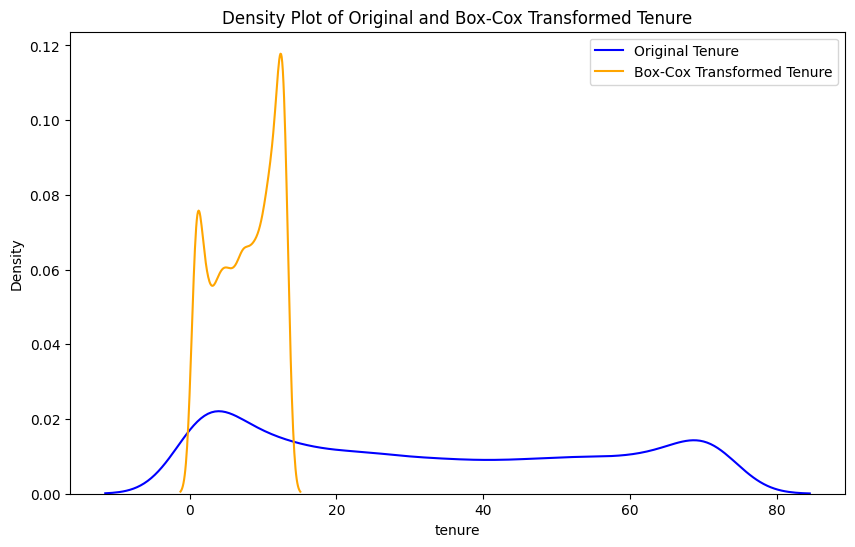

In [37]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['tenure'], label='Original Tenure', color='blue')
sns.kdeplot(df['boxcox_tenure'], label='Box-Cox Transformed Tenure', color='orange')
plt.title("Density Plot of Original and Box-Cox Transformed Tenure")
plt.legend()
plt.show()

# Analysis and Summary

## Churn Value counts

There are 5174 customers who did not churn (Churn: No) and 1869 customers who churned (Churn: Yes). This information provides an  understanding of the dataset's churn distribution, which is essential for subsequent analyses related to customer retention and predictive modeling.

## Filtering Data

Data is filtered based on the Churn column and tenure column.
```shell
unique_churn_values: Contains data for customers with churn equal to Yes
least_tenure_df: Contains data for customers with tenure less than 10.
```
This enables a focused analysis on specific segments of the customer base, such as those who have churned or those with less tenure.

## Boxplot for Numeric Columns

The boxplot visually represents the distribution of numeric columns (tenure, MonthlyCharges, and TotalCharges).
Identifying potential outliers is essential for understanding data quality and potential data issues. The boxplot aids in visualizing the spread of data and potential extreme values.

## Handling Outliers

Outliers are clipped for each numeric column using the interquartile range (IQR) method.
Outliers can significantly impact statistical analyses. By handling outliers, the dataset becomes more robust, and subsequent analyses are less influenced by extreme values.

## Missing Values Check and Handling

There are 11 missing values in the TotalCharges column.
Missing values are dropped using df.dropna(inplace=True).


## Categorical to Numeric Conversion

The Churn and PhoneService columns are converted to numeric. Converting categorical variables to numeric is necessary for many machine learning algorithms. It facilitates quantitative analysis and model training.

## Feature Engineering

Log transformation of MonthlyCharges and the creation of two new features:
```shell
TotalCharges_Tenure_Ratio (Ratio of TotalCharges to Tenure)
MonthlyCharges_to_TotalCharges_Ratio (Ratio of MonthlyCharges to TotalCharges)
```
Feature engineering helps create additional relevant features that may improve the performance of predictive models. Log transformation is often used to handle skewed data, and the new ratios provide insights into the relationships between variables.

## Scatter Plots and Histograms for Feature Relationships

Visualizations are created to explore relationships, such as TotalCharges_Tenure_Ratio  and MonthlyCharges_to_TotalCharges_Ratio.
Visualizing relationships helps in understanding patterns, correlations, and potential dependencies between features, aiding further analysis and model development.

## Advanced Outlier Detection - Boxplot Analysis

The boxplot for scaled numeric data, as part of advanced outlier detection, provides insights into the distribution of standardized values for different features. 
**Tenure**
The boxplot shows that most values are clustered around the median, with a few outliers at both ends. This suggests that while the majority of customers have similar tenure values, there are some extreme cases.

**PhoneService**

Being a binary variable (0 or 1), the boxplot here indicates that the values are concentrated at the extremes (0 and 1), with no apparent outliers.

**MonthlyCharges**

The boxplot for MonthlyCharges shows a relatively symmetric distribution with a few outliers on the higher side. This suggests that most customers have similar monthly charges, but there are some with significantly higher charges.

**TotalCharges**

Similar to MonthlyCharges, TotalCharges exhibit a symmetric distribution with a few outliers on the higher side. This implies that while most customers have similar total charges, there are outliers with exceptionally high total charges.

**Churn**

Being a binary variable (0 or 1), the boxplot for Churn indicates that the values are concentrated at the extremes (0 and 1), with no apparent outliers.

**MonthlyCharges_to_TotalCharges_Ratio**

The boxplot reveals a distribution of the ratio, showing the spread and presence of outliers. Most values are clustered around the median, but there are some customers with significantly different ratios, indicating potential variations in spending patterns.


## BoxcoxTransform

The boxcox transform is applied to the tenure column. The transformed data is centered around 0 and standardized, making the distribution more symmetric and normal. The density plot shows the before-and-after comparison, highlighting the transformation's impact on the distribution.
